In [1]:
import numpy as np
import matplotlib.pyplot as plt

Original sample median: 0.283
Bootstrapped 95% Confidence Interval for the median: [0.22122149 0.31288132]


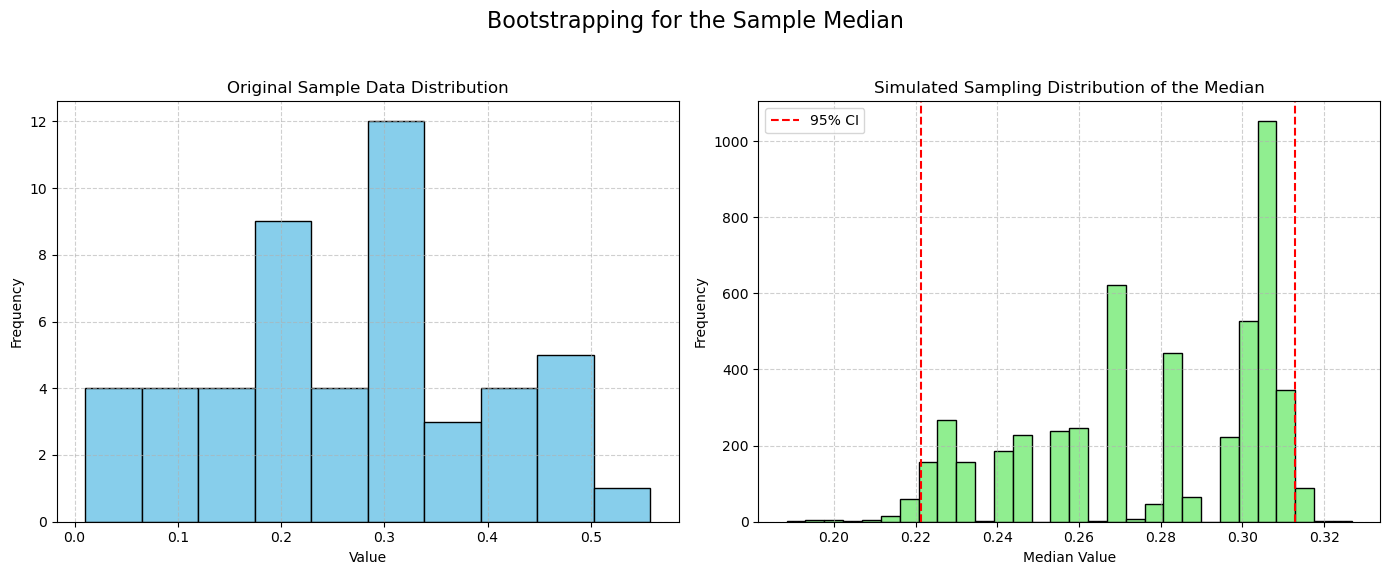

In [4]:
# 1. Create a simulated, skewed population data using a modern NumPy random generator.
# Using a generator instance is the preferred method for reproducibility and thread-safety.
# We'll use a Beta distribution to create a dataset that is not normal.
# This makes it a good candidate for bootstrapping.
rng = np.random.default_rng(42)  # Create a Generator instance with a seed for reproducibility
population_data = rng.beta(a=2, b=5, size=100000)

# 2. Draw a small, non-normal sample from the population.
# This is our single, "real-world" sample.
sample_size = 50
sample_data = rng.choice(population_data, size=sample_size, replace=False)

# 3. Perform the bootstrapping process.
n_bootstraps = 5000
bootstrap_medians = []

for _ in range(n_bootstraps):
    # Resample from the original sample with replacement
    bootstrap_sample = rng.choice(sample_data, size=sample_size, replace=True)
    # Calculate the median for the new bootstrap sample
    bootstrap_medians.append(np.median(bootstrap_sample))

# 4. Visualize the results.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Bootstrapping for the Sample Median', fontsize=16)

# Plot the original sample data
ax1.hist(sample_data, bins=10, edgecolor='black', color='skyblue')
ax1.set_title('Original Sample Data Distribution')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot the simulated sampling distribution of the median
ax2.hist(bootstrap_medians, bins=30, edgecolor='black', color='lightgreen')
ax2.set_title('Simulated Sampling Distribution of the Median')
ax2.set_xlabel('Median Value')
ax2.set_ylabel('Frequency')
ax2.grid(True, linestyle='--', alpha=0.6)

# 5. Calculate and display the 95% confidence interval.
confidence_interval = np.percentile(bootstrap_medians, [2.5, 97.5])
ax2.axvline(x=confidence_interval[0], color='red', linestyle='--', label='95% CI')
ax2.axvline(x=confidence_interval[1], color='red', linestyle='--')
ax2.legend()

# Display the calculated confidence interval in the console.
print(f"Original sample median: {np.median(sample_data):.3f}")
print(f"Bootstrapped 95% Confidence Interval for the median: {confidence_interval}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../../assets/images/probability/bootstrap_example.png', bbox_inches='tight');